<a href="https://colab.research.google.com/github/cing3000/Reinforcement-Learning-An-Introduction/blob/master/RL_CartPole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import gym
import numpy as np
from IPython.display import display, HTML, Javascript
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import time, math
from tqdm import tqdm

import tensorflow as tf
import tensorflow.contrib.slim as slim
from tensorflow.contrib import layers

%matplotlib inline

#from pyvirtualdisplay import Display

In [0]:
# display frames
def display_frames(frames):
    
    import base64, uuid
    from io import BytesIO
    
    obj_id = "ani_" + str(uuid.uuid4()).replace('-', '')
    img_id = "img_" + str(uuid.uuid4()).replace('-', '')
    slider_id = "sli_" + str(uuid.uuid4()).replace('-', '')
    loop_id = "loop_" + str(uuid.uuid4()).replace('-', '')
    javascript = "<link rel=\"stylesheet\" href=\"https://maxcdn.bootstrapcdn.com/font-awesome/4.4.0/css/font-awesome.min.css\"><script language=\"javascript\">"
    javascript += "function Animation(t,i,e,r,n){this.img_id=i,this.slider_id=e,this.loop_select_id=n,this.interval=r,this.current_frame=0,this.direction=0,this.timer=null,this.frames=new Array(t.length);"
    javascript += "for(var s=0;s<t.length;s++)this.frames[s]=new Image,this.frames[s].src=t[s];document.getElementById(this.slider_id).max=this.frames.length-1,this.set_frame(this.current_frame)}Animation."
    javascript += "prototype.get_loop_state=function(){for(var t=document[this.loop_select_id].state,i=0;i<t.length;i++){var e=t[i];if(e.checked)return e.value}},Animation.prototype.set_frame=function(t)"
    javascript += "{this.current_frame=t,document.getElementById(this.img_id).src=this.frames[this.current_frame].src,document.getElementById(this.slider_id).value=this.current_frame},Animation.prototype."
    javascript += "next_frame=function(){this.set_frame(Math.min(this.frames.length-1,this.current_frame+1))},Animation.prototype.previous_frame=function(){this.set_frame(Math.max(0,this.current_frame-1))},"
    javascript += "Animation.prototype.first_frame=function(){this.set_frame(0)},Animation.prototype.last_frame=function(){this.set_frame(this.frames.length-1)},Animation.prototype.slower=function(){this.interval/=.7,0"
    javascript += "<this.direction?this.play_animation():this.direction<0&&this.reverse_animation()},Animation.prototype.faster=function(){this.interval*=.7,0<this.direction?this.play_animation():this.direction<0&&this."
    javascript += "reverse_animation()},Animation.prototype.anim_step_forward=function(){if(this.current_frame+=1,this.current_frame<this.frames.length)this.set_frame(this.current_frame);else{var t=this.get_loop_state();"
    javascript += "\"loop\"==t?this.first_frame():\"reflect\"==t?(this.last_frame(),this.reverse_animation()):(this.pause_animation(),this.last_frame())}},Animation.prototype.anim_step_reverse=function(){if(this.current_"
    javascript += "frame-=1,0<=this.current_frame)this.set_frame(this.current_frame);else{var t=this.get_loop_state();\"loop\"==t?this.last_frame():\"reflect\"==t?(this.first_frame(),this.play_animation()):(this.pause_animation(),this.first_frame())}},Animation.prototype.pause_animation=function(){this.direction=0,this.timer&&(clearInterval(this.timer),this.timer=null)},Animation.prototype.play_animation=function(){this.pause_animation(),this.direction=1;var t=this;this.timer||(this.timer=setInterval(function(){t.anim_step_forward()},this.interval))},Animation.prototype.reverse_animation=function(){this.pause_animation(),this.direction=-1;var t=this;this.timer||(this.timer=setInterval(function(){t.anim_step_reverse()},this.interval))};</script>"
    
    html = "<div class=\"animation\" align=\"center\"><img id=\"" + img_id + "\"><br><input id=\"" + slider_id + "\" type=\"range\" style=\"width:350px\" name=\"points\" min=\"0\" max=\"1\" step=\"1\" value=\"0\" onchange=\"" + obj_id + ".set_frame(parseInt(this.value));\"></input><br><button onclick=\"" + obj_id + ".slower()\"><i class=\"fa fa-minus\"></i></button><button onclick=\"" + obj_id + ".first_frame()\"><i class=\"fa fa-fast-backward\"></i></button><button onclick=\"" + obj_id + ".previous_frame()\"><i class=\"fa fa-step-backward\"></i></button><button onclick=\"" + obj_id + ".reverse_animation()\"><i class=\"fa fa-play fa-flip-horizontal\"></i></button><button onclick=\"" + obj_id + ".pause_animation()\"><i class=\"fa fa-pause\"></i></button><button onclick=\"" + obj_id + ".play_animation()\"><i class=\"fa fa-play\"></i></button><button onclick=\"" + obj_id + ".next_frame()\"><i class=\"fa fa-step-forward\"></i></button><button onclick=\"" + obj_id + ".last_frame()\"><i class=\"fa fa-fast-forward\"></i></button><button onclick=\"" + obj_id + ".faster()\"><i class=\"fa fa-plus\"></i></button><form action=\"#n\" name=\"" + loop_id + "\" class=\"anim_control\"><input type=\"radio\" name=\"state\"  value=\"once\" > Once</input><input type=\"radio\" name=\"state\" value=\"loop\" checked> Loop</input><input type=\"radio\" name=\"state\" value=\"reflect\" > Reflect</input></form></div>"
    html += "<script language=\"javascript\">(function(){var img_id = \"%s\";var slider_id=\"%s\";var loop_select_id=\"%s\";var frames = new Array(0);" % (img_id, slider_id, loop_id)

    for i, f in enumerate(frames):
        frame = Image.fromarray(f)
        buf = BytesIO()
        frame.save(buf, format="PNG")
        imgstr = base64.b64encode(buf.getvalue()).decode('ascii')
        html += "frames[%d] = \"data:image/png;base64,%s\";" % (i,imgstr)
        
    html += "setTimeout(function() {%s = new Animation(frames, img_id, slider_id, 200.0, loop_select_id);}, 0);})()</script>" % obj_id

    display(HTML(javascript + html))

In [0]:
# environment
class CartPole:
    
    def __init__(self):
        self.env = gym.make('CartPole-v0')
        self.action_space = self.env.action_space
        self.reset()
    
    # reset environment to init state
    def reset(self):
        return self.env.reset()
        
    # visualize environment
    def draw(self):
        return self.env.render(mode='rgb_array')
    
    # step
    def step(self, action):
        return self.env.step(action)

In [0]:
# hyper-parameters
episodes = 200
batch_size = 4

alpha = 0.01
gamma = 0.99
epsilon = 0.1

s_size = 4
a_size = 2
alpha_w = 1e-2
alpha_theta = 1e-2

100%|██████████| 200/200 [00:48<00:00,  4.30it/s]


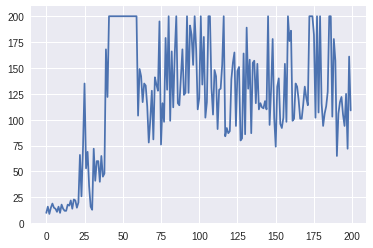

In [0]:
# create virtual screen for gym rendering
#vdisplay = Display(visible=0, size=(400, 300))
#vdisplay.start()

# create environment and neural network model
cp = CartPole()

tf.reset_default_graph()
graph = tf.Graph()
with graph.as_default():

    in_state = tf.placeholder(shape=[None, s_size], dtype=tf.float32)
    theta1 = slim.fully_connected(in_state, 8, biases_initializer=None, activation_fn=tf.nn.relu, scope="theta/l1")
    #theta2 = slim.fully_connected(theta1, 16, biases_initializer=None, activation_fn=tf.nn.relu, scope="theta/l2")
    out_action = slim.fully_connected(theta1, a_size, biases_initializer=None, activation_fn=tf.nn.softmax, scope="theta/out")
    
    w1 = slim.fully_connected(in_state, 8, biases_initializer=None, activation_fn=tf.nn.relu, scope="w/l1")
    #w2 = slim.fully_connected(w1, 16, biases_initializer=None, activation_fn=tf.nn.relu, scope="w/l2")
    out_v = slim.fully_connected(w1, 1, biases_initializer=None, activation_fn=None, scope="w/out")
    
    #in_action = tf.placeholder(shape=[None,], dtype=tf.int32)
    in_action = tf.placeholder(dtype=tf.int32)
    
    loss_w = -out_v
    
    #action_onehot = tf.one_hot(in_action, a_size, dtype=tf.int32)
    #responsible_action = tf.reduce_sum(out_action * action_onehot, axis=-1)
    #loss_theta = -tf.reduce_mean(tf.log(responsible_action))
    loss_theta = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=tf.squeeze(out_action), labels=in_action)
    
    vars_theta = tf.trainable_variables(scope="theta")
    vars_w = tf.trainable_variables(scope="w")

    grad_theta = tf.gradients(loss_theta, vars_theta)
    grad_w = tf.gradients(loss_w, vars_w)

    in_grad_theta = []
    in_grad_w = []
    for idx, grad in enumerate(vars_theta):
        placeholder = tf.placeholder(tf.float32, name=str(idx)+'_holder')
        in_grad_theta.append(placeholder)
    for idx, grad in enumerate(vars_w):
        placeholder = tf.placeholder(tf.float32, name=str(idx)+'_holder')
        in_grad_w.append(placeholder)

    opt_theta = tf.train.AdamOptimizer(learning_rate=alpha_theta)
    opt_w = tf.train.AdamOptimizer(learning_rate=alpha_w)

    update_theta = opt_theta.apply_gradients(zip(in_grad_theta, vars_theta))
    update_w = opt_w.apply_gradients(zip(in_grad_w, vars_w))

    
# records for ploting
steps = []
losses = []

# train
with tf.Session(graph=graph) as sess:
    tf.global_variables_initializer().run()
    
    # gradients buffer for batch update
    g_t_buf = sess.run(tf.trainable_variables(scope="theta"))
    for idx,grad in enumerate(g_t_buf):
        g_t_buf[idx] = grad * 0
    g_w_buf = sess.run(tf.trainable_variables(scope="w"))
    for idx,grad in enumerate(g_w_buf):
        g_w_buf[idx] = grad * 0
    
    total_step = 0
    
    for epoch in tqdm(range(episodes)):

        # start a new epoch
        s = cp.reset()

        # empty list for records
        states = []
        actions = []
        rewards = []
        
        # init variables
        i = 1
        step = 0
        done = False

        # generate a episode
        while not done:
            
            state = s.reshape([1, -1])
            
            # choose action
            pi_s = sess.run([out_action], feed_dict={in_state: state})
            #if np.random.rand() > epsilon / (epoch+1):
            #    a = np.argmax(pi_s[0][0])
            #else:
            #    a = np.random.choice(2)
            a = np.random.choice(a_size, p=pi_s[0][0])

            # execute action, move to next state
            s1, r, done, _ = cp.step(a)
            
            #r = -np.log(1-step/200)
            #r = np.exp(step/200)/math.e
            r = -1 if done else 0
            #r = 1 if step >= 199 else r
            
            state1 = s1.reshape([1, -1])
            
            # update network
            v = sess.run(out_v, feed_dict={in_state: state})
            if not done:
                v1 = sess.run(out_v, feed_dict={in_state: state1})
                delta = r + gamma*v1[0,0] - v[0,0]
            else:
                delta = r - v[0,0]
                
            g_t, g_w = sess.run([grad_theta, grad_w],
                                    feed_dict={in_state: state, in_action: a})

            for idx,grad in enumerate(g_t):
                g_t_buf[idx] += grad*i*delta
            for idx,grad in enumerate(g_w):
                g_w_buf[idx] += grad*i*delta

            if total_step % batch_size == 0 and total_step != 0:
                _= sess.run([update_theta], feed_dict=dict(zip(in_grad_theta, g_t_buf)))
                _= sess.run([update_w], feed_dict=dict(zip(in_grad_w, g_w_buf)))

                #g_t_buf = np.zeros_like(g_t_buf)
                #g_w_buf = np.zeros_like(g_w_buf)

            i *= gamma
            step += 1
            total_step += 1
            s = s1
        
        # steps
        steps.append(step)
        
    # sample display
    '''
    frames = []
    done = False
    
    s = cp.reset()
    frames.append(cp.draw())

    while not done:

        state = s.reshape([1, -1])

        # choose action
        pi_s = sess.run([out_action], feed_dict={in_state: state})
        a = np.random.choice(a_size, p=pi_s[0][0])

        # execute action, move to next state
        s1, r, done, _ = cp.step(a)

        # draw
        frames.append(cp.draw())

        s = s1

    display_frames(frames)
    '''


# plot
plt.plot(steps)
#plt.plot(np.mean(np.array(steps).reshape(-1, 25), axis=1))
plt.show()

#vdisplay.clear_output(wait=True)
cp.env.close()

In [0]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [0]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1